In [1]:
#Import Libraries and Packages 
import numpy as np
import pandas as pd


In [2]:
#Import dataset
dataset = pd.read_csv("SMSSpamCollection", sep='\t', names=['label', 'message'])

In [3]:
dataset

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will ü b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [4]:
dataset.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   label    5572 non-null   object
 1   message  5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [5]:
dataset['label'] = dataset['label'].map(('ham' : 0, 'spam' : 1))

SyntaxError: invalid syntax (1551872917.py, line 1)

In [6]:
dataset['label'] = dataset['label'].map({'ham' : 0, 'spam' : 1})

In [7]:
dataset

,label,message
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...
5568,0,Will ü b going to esplanade fr home?
5569,0,"Pity, * was in mood for that. So...any other s..."
5570,0,The guy did some bitching but I acted like i'd...


In [9]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

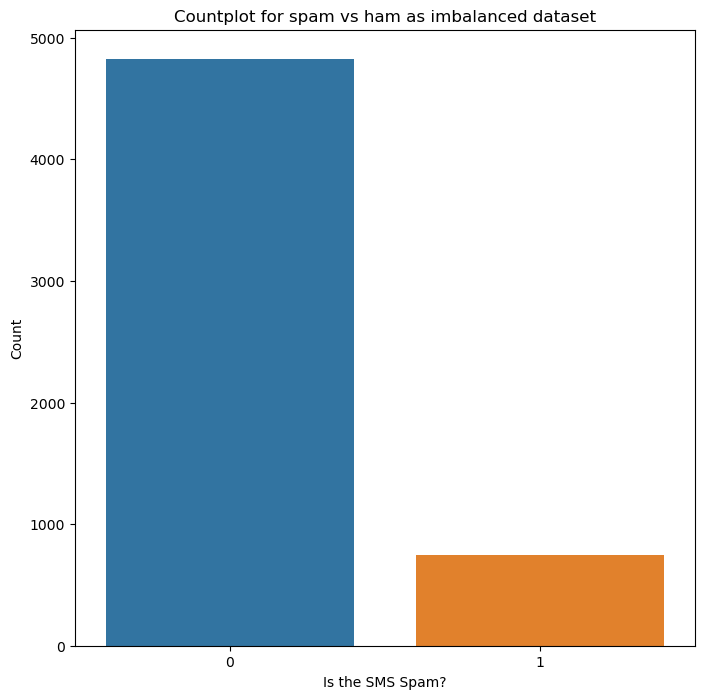

In [11]:
# Countplot for spam vs ham as imbalanced dataset 
plt.figure(figsize=(8,8))
g=sns.countplot(x="label", data=dataset)
p=plt.title('Countplot for spam vs ham as imbalanced dataset')
p=plt.xlabel('Is the SMS Spam?')
p=plt.ylabel('Count')

In [12]:
only_spam = dataset[dataset["label"] == 1]

In [13]:
only_spam

,label,message
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
5,1,FreeMsg Hey there darling it's been 3 week's n...
8,1,WINNER!! As a valued network customer you have...
9,1,Had your mobile 11 months or more? U R entitle...
11,1,"SIX chances to win CASH! From 100 to 20,000 po..."
...,...,...
5537,1,Want explicit SEX in 30 secs? Ring 02073162414...
5540,1,ASKED 3MOBILE IF 0870 CHATLINES INCLU IN FREE ...
5547,1,Had your contract mobile 11 Mnths? Latest Moto...
5566,1,REMINDER FROM O2: To get 2.50 pounds free call...


In [15]:
print('Number of spam SMS:', len(only_spam))
print('Number of ham SMS:', len(dataset) - len(only_spam))

Number of spam SMS: 747
Number of ham SMS: 4825


In [18]:
count = int((dataset.shape[0] - only_spam.shape[0]) / only_spam.shape[0])

In [19]:
count

6

In [20]:
for i in range(0,count-1):
    dataset = pd.concat([dataset,only_spam])
    
dataset.shape

(9307, 2)

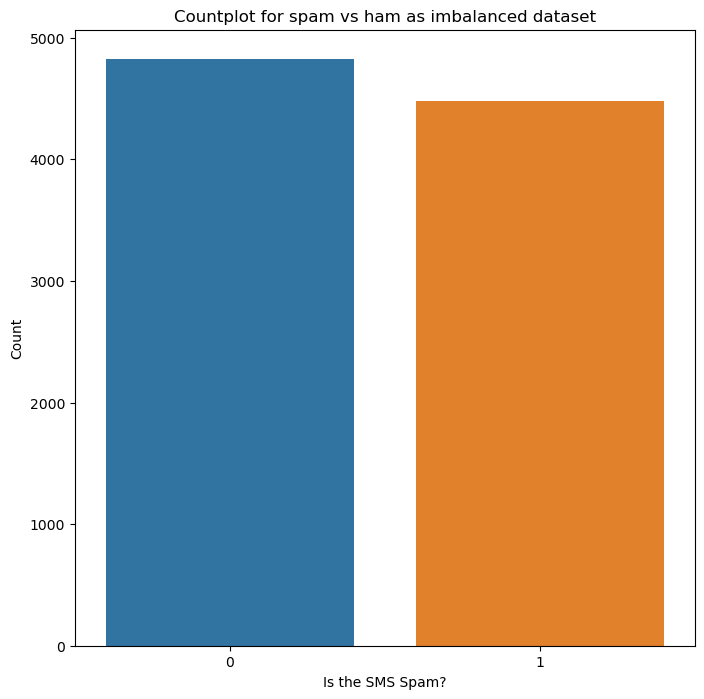

In [21]:
# Countplot for spam vs ham as imbalanced dataset 
plt.figure(figsize=(8,8))
g=sns.countplot(x="label", data=dataset)
p=plt.title('Countplot for spam vs ham as imbalanced dataset')
p=plt.xlabel('Is the SMS Spam?')
p=plt.ylabel('Count')

In [22]:
#Creating a new feature: word_count
dataset['word_count'] = dataset['message'].apply(lambda x: len(x.split()))

In [23]:
dataset

,label,message,word_count
0,0,"Go until jurong point, crazy.. Available only ...",20
1,0,Ok lar... Joking wif u oni...,6
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,28
3,0,U dun say so early hor... U c already then say...,11
4,0,"Nah I don't think he goes to usf, he lives aro...",13
...,...,...,...
5537,1,Want explicit SEX in 30 secs? Ring 02073162414...,16
5540,1,ASKED 3MOBILE IF 0870 CHATLINES INCLU IN FREE ...,33
5547,1,Had your contract mobile 11 Mnths? Latest Moto...,28
5566,1,REMINDER FROM O2: To get 2.50 pounds free call...,28


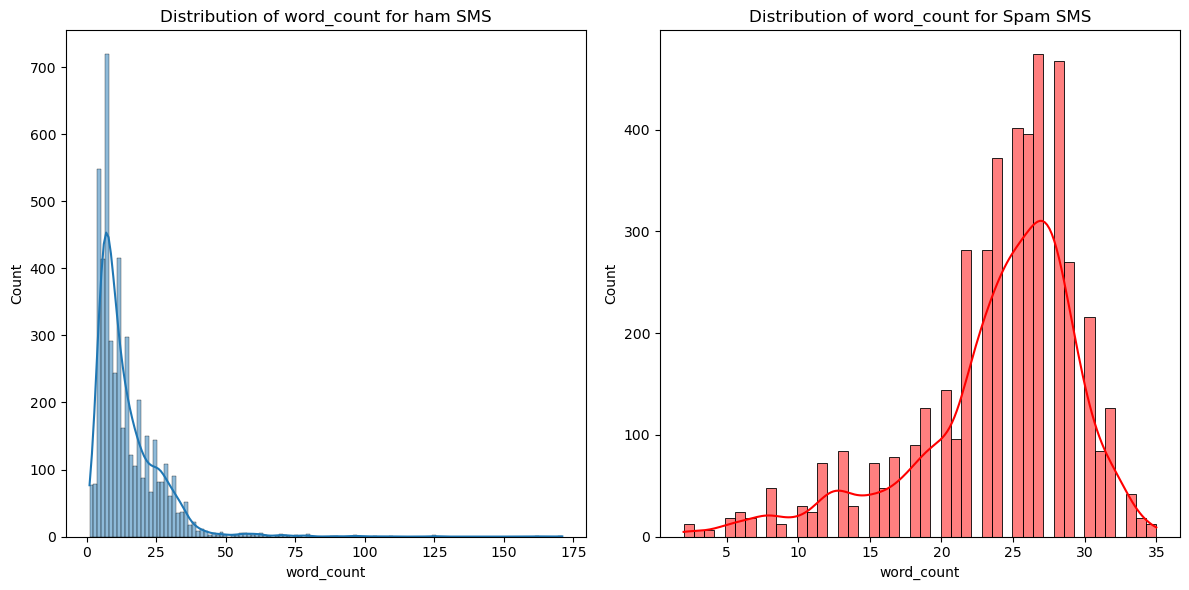

In [26]:
plt.figure(figsize=(12,6))
#1,1
plt.subplot(1,2,1)
g = sns.histplot(dataset[dataset["label"] == 0].word_count, kde=True)
p = plt.title('Distribution of word_count for ham SMS')

#1,2
plt.subplot(1,2,2)
g = sns.histplot(dataset[dataset["label"] == 1].word_count, color="red", kde=True)
p = plt.title('Distribution of word_count for Spam SMS')

plt.tight_layout()
plt.show()

In [32]:
#Creating new feature containing currency symbols 
def currency(data):
    currency_symbols = ['€', '$', '¥', '£', '₹']
    for i in currency_symbols:
            if i in data:
                return 1
    return 0
    

In [33]:
dataset["contains_currency_symbols"] = dataset["message"].apply(currency)

In [34]:
dataset

,label,message,word_count,contains_currency_symbols
0,0,"Go until jurong point, crazy.. Available only ...",20,0
1,0,Ok lar... Joking wif u oni...,6,0
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,28,0
3,0,U dun say so early hor... U c already then say...,11,0
4,0,"Nah I don't think he goes to usf, he lives aro...",13,0
...,...,...,...,...
5537,1,Want explicit SEX in 30 secs? Ring 02073162414...,16,0
5540,1,ASKED 3MOBILE IF 0870 CHATLINES INCLU IN FREE ...,33,1
5547,1,Had your contract mobile 11 Mnths? Latest Moto...,28,0
5566,1,REMINDER FROM O2: To get 2.50 pounds free call...,28,0


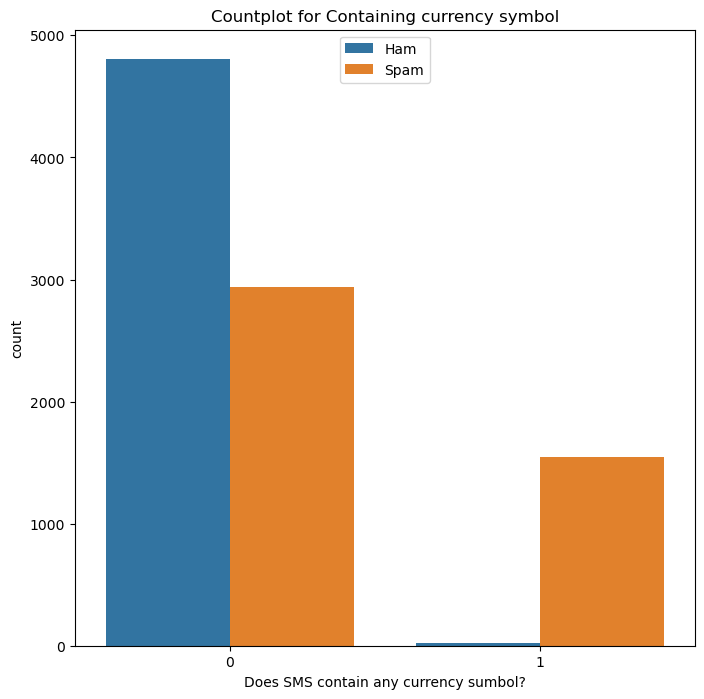

In [35]:
#Countplot for contains_currency_symbols
plt.figure(figsize=(8,8))
g = sns.countplot(x='contains_currency_symbols', data=dataset, hue = "label")
p = plt.title('Countplot for Containing currency symbol')
p = plt.xlabel('Does SMS contain any currency sumbol?')
p = plt.ylabel('count')
p = plt.legend(labels=["Ham", "Spam"], loc = 9)

In [36]:
#Creating new feature of containing numbers 
def number(data):
    for i in data:
        if ord(i) >= 48 and ord(i) <= 57:
            return 1 
    return 0

In [38]:
dataset['contains_numbers'] = dataset['message'].apply(number)

In [39]:
dataset

,label,message,word_count,contains_currency_symbols,contains_numbers
0,0,"Go until jurong point, crazy.. Available only ...",20,0,0
1,0,Ok lar... Joking wif u oni...,6,0,0
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,28,0,1
3,0,U dun say so early hor... U c already then say...,11,0,0
4,0,"Nah I don't think he goes to usf, he lives aro...",13,0,0
...,...,...,...,...,...
5537,1,Want explicit SEX in 30 secs? Ring 02073162414...,16,0,1
5540,1,ASKED 3MOBILE IF 0870 CHATLINES INCLU IN FREE ...,33,1,1
5547,1,Had your contract mobile 11 Mnths? Latest Moto...,28,0,1
5566,1,REMINDER FROM O2: To get 2.50 pounds free call...,28,0,1


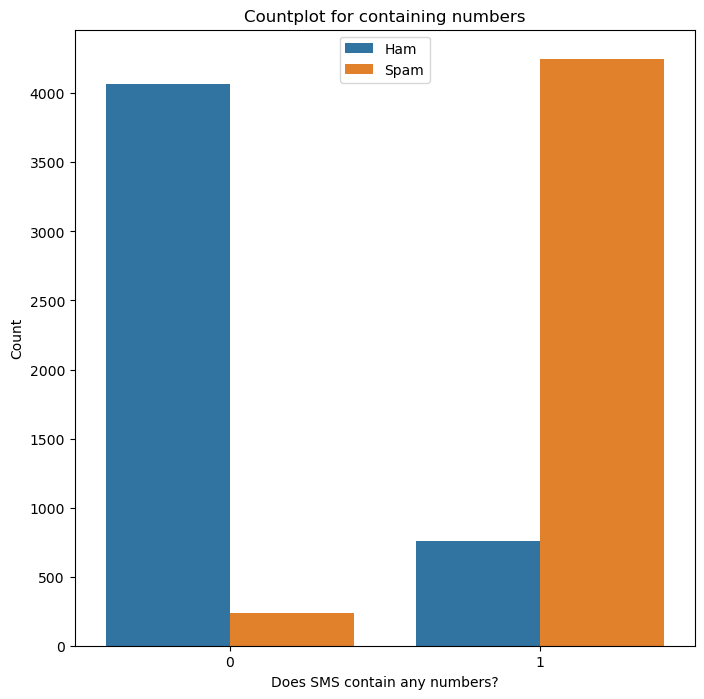

In [43]:
# Countplot for containing numbers
plt.figure(figsize=(8, 8))
g = sns.countplot(x='contains_numbers', data=dataset, hue='label')
p = plt.title('Countplot for containing numbers')
p = plt.xlabel('Does SMS contain any numbers?')
p = plt.ylabel('Count')
p = plt.legend(labels=["Ham", "Spam"], loc=9)


In [44]:
import nltk
import re
nltk.download('stopwords')
nltk.download('wordnet')
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\DELL\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\DELL\AppData\Roaming\nltk_data...


In [47]:
corpus = []
wnl = WordNetLemmatizer()
for sms in list(dataset.message):
    message = re.sub(pattern='[^a-zA-Z]', repl = ' ', string=sms)
    message = message.lower()
    words = message.split()
    filtered_words = [word for word in words if word not in set(stopwords.words('english'))]
    lemm_words = [wnl.lemmatize(word) for word in filtered_words]
    message = ' '.join(lemm_words)
    
    corpus.append(message)

In [48]:
corpus

['go jurong point crazy available bugis n great world la e buffet cine got amore wat',
 'ok lar joking wif u oni',
 'free entry wkly comp win fa cup final tkts st may text fa receive entry question std txt rate c apply',
 'u dun say early hor u c already say',
 'nah think go usf life around though',
 'freemsg hey darling week word back like fun still tb ok xxx std chgs send rcv',
 'even brother like speak treat like aid patent',
 'per request melle melle oru minnaminunginte nurungu vettam set callertune caller press copy friend callertune',
 'winner valued network customer selected receivea prize reward claim call claim code kl valid hour',
 'mobile month u r entitled update latest colour mobile camera free call mobile update co free',
 'gonna home soon want talk stuff anymore tonight k cried enough today',
 'six chance win cash pound txt csh send cost p day day tsandcs apply reply hl info',
 'urgent week free membership prize jackpot txt word claim c www dbuk net lccltd pobox ldnw rw'

In [51]:
# Creating the TF-IDF vectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(max_features=500)
vectors = tfidf.fit_transform(corpus).toarray()
feature_names = tfidf.get_feature_names_out()


In [52]:
x=pd.DataFrame(vectors, columns = feature_names)
y = dataset['label']

In [53]:
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.metrics import classification_report, confusion_matrix

In [55]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [56]:
x_train

,ac,access,account,address,admirer,age,already,also,always,amp,...,xxx,ya,yeah,year,yes,yesterday,yet,yo,yr,yup
3533,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
2592,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
4253,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.343368,0.0,0.0,0.0,0.0,0.0,0.0
6976,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
7191,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5734,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
5191,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
5390,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
860,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0


In [57]:
x_test

,ac,access,account,address,admirer,age,already,also,always,amp,...,xxx,ya,yeah,year,yes,yesterday,yet,yo,yr,yup
1155,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.72412,0.0,0.0,0.0,0.0
1790,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.557154,0.0,0.0,0.00000,0.0,0.0,0.0,0.0
3003,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.00000,0.0,0.0,0.0,0.0
6489,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.00000,0.0,0.0,0.0,0.0
592,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.00000,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4147,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.00000,0.0,0.0,0.0,0.0
274,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.00000,0.0,0.0,0.0,0.0
1345,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.00000,0.0,0.0,0.0,0.0
8891,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.00000,0.0,0.0,0.0,0.0


In [60]:
from sklearn.naive_bayes import MultinomialNB
mnb = MultinomialNB()
cv = cross_val_score(mnb, x, y, scoring='f1', cv=10)
print(round(cv.mean(),3))
print(round(cv.std(),3))

0.943
0.004


In [61]:
mnb.fit(x_train, y_train)
y_pred = mnb.predict(x_test)

In [63]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.94      0.94      0.94       959
           1       0.94      0.94      0.94       903

    accuracy                           0.94      1862
   macro avg       0.94      0.94      0.94      1862
weighted avg       0.94      0.94      0.94      1862



In [64]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[905,  54],
       [ 56, 847]], dtype=int64)

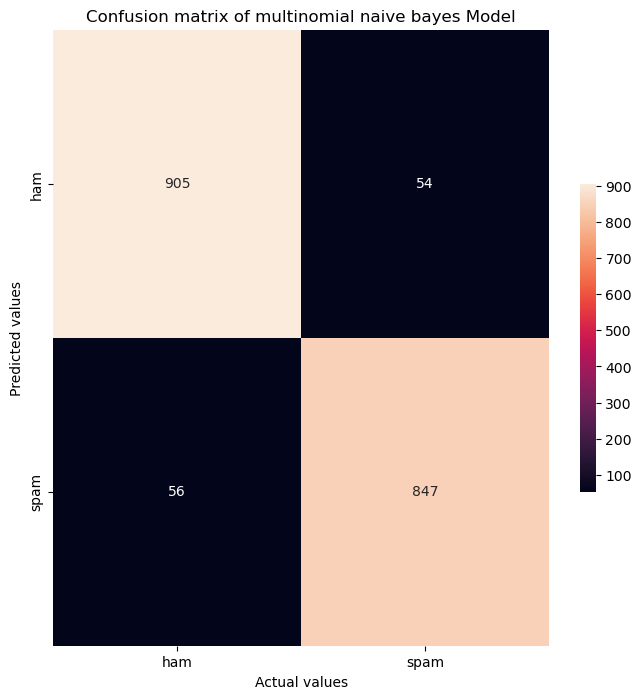

In [70]:
plt.figure(figsize=(8, 8))
axis_labels = ['ham', 'spam']
g = sns.heatmap(data=cm, xticklabels=axis_labels, yticklabels=axis_labels, annot=True, fmt='g', cbar_kws={"shrink": 0.5})
p = plt.title("Confusion matrix of multinomial naive bayes Model")
p = plt.xlabel('Actual values')
p = plt.ylabel("Predicted values")


In [78]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
cv1 = cross_val_score(dt, x, y, scoring='f1', cv=10)
print(round(cv1.mean(),3))
print(round(cv1.std(),3))

0.98
0.004


In [81]:
dt.fit(x_train, y_train)
y_pred1 = dt.predict(x_test)

In [82]:
print(classification_report(y_test, y_pred1))

              precision    recall  f1-score   support

           0       1.00      0.97      0.98       959
           1       0.97      1.00      0.98       903

    accuracy                           0.98      1862
   macro avg       0.98      0.98      0.98      1862
weighted avg       0.98      0.98      0.98      1862



In [84]:
cm1 = confusion_matrix(y_test, y_pred1)
cm1

array([[933,  26],
       [  4, 899]], dtype=int64)

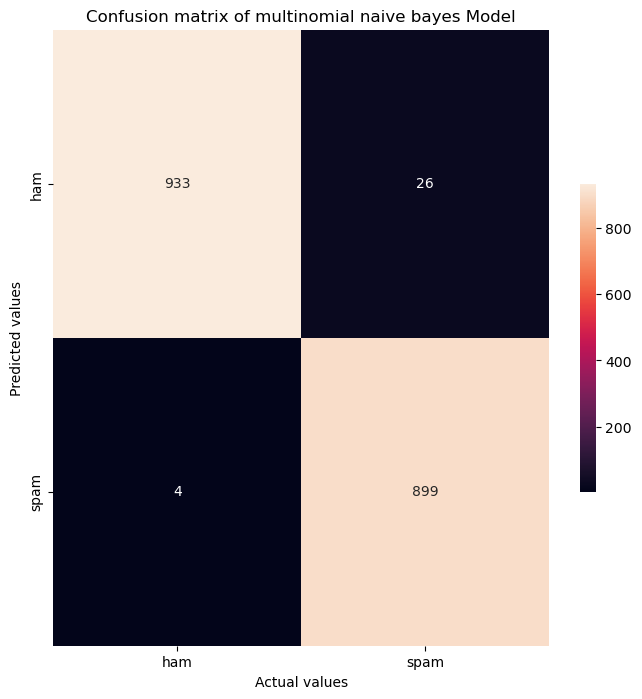

In [85]:
plt.figure(figsize=(8, 8))
axis_labels = ['ham', 'spam']
g = sns.heatmap(data=cm1, xticklabels=axis_labels, yticklabels=axis_labels, annot=True, fmt='g', cbar_kws={"shrink": 0.5})
p = plt.title("Confusion matrix of multinomial naive bayes Model")
p = plt.xlabel('Actual values')
p = plt.ylabel("Predicted values")
